In [1]:
import pandas as pd
import os
import numpy

In [2]:
filepath = 'qos_full.xls'
all_df = pd.read_excel('qos_full.xls')

In [3]:
df = all_df.drop(['roundTripDelayMax', 'roundTripDelayMin'], axis=1)

In [4]:
df.loc[((df['roundTripDelayMean'] == 0) | (df['roundTripPacketLoss'] > 0) | (df['uplinkPacketLoss'] > 0) | (df['downlinkPacketLoss'] > 0 ) | (df['roundTripDelayMean'] > 30000) | (df['uplinkJitterMax'] > 10000) | (df['downlinkJitterMax'] > 10000 )) | (df['downlinkJitterMax'] == 0) | (df['downlinkJitterMaxTH'] == 0) | (df['downlinkJitterMean'] == 0) | (df['uplinkJitterMax'] ==0 ) | (df['uplinkJitterMaxTH'] ==0 ) | (df['uplinkJitterMean'] ==0 ), 'alarm'] = 1

In [5]:
import seaborn as sns

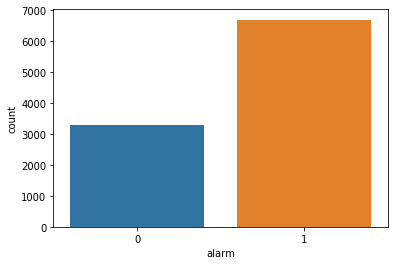

In [6]:
sns.countplot(x='alarm', data=df)

In [7]:
df = df.drop(['number'], axis=1)
x_OneHot_df = pd.get_dummies(data=df, columns=['access', 'region'])

In [8]:
x_OneHot_df['time'] = pd.to_datetime(x_OneHot_df['time'])
x_OneHot_df['hour'] = x_OneHot_df['time'].apply(lambda time:time.hour)
df_new = x_OneHot_df.drop(['time'], axis=1)
df_sort = df_new.sort_values(by=['hour'])

In [9]:
df_sort['upRate'] = df_sort['upRate'].map({'64K':0, '2M': 1, '3M': 2, '5M':3, '6M':4, '20M':5,
                                           '40M':6, '100M':7, '250M':8, '600M':9})
df_sort['downRate'] = df_sort['downRate'].map({'2M':0, '6M':1, '12M':2, '16M':3,
                                              '20M':4, '35M':5, '60M':6, '100M':7,
                                              '300M':8, '500M':9, '1G': 10})

In [10]:
X = df_sort.drop('alarm', axis=1).values
y= df_sort['alarm'].values

In [11]:
X.shape

(10000, 18)

In [12]:
y.shape

(10000,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train.shape

(8000, 18)

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

Using TensorFlow backend.


In [19]:
model = Sequential()

model.add(Embedding(output_dim=32,
                   input_dim=18))
model.add(Dropout(0.2))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=8, recurrent_dropout=0.2))

model.add(Dense(units=1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          576       
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
dense_8 (Dense)              (None, None, 32)          1056      
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
dense_9 (Dense)              (None, None, 16)          528       
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 8)                

In [21]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
#from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_loss', mode='min', patience=2)

In [22]:
train_history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
                         epochs=100,
                         batch_size=128,
                         verbose=2,
                         )


Train on 8000 samples, validate on 2000 samples
Epoch 1/100
 - 2s - loss: 0.6599 - accuracy: 0.6249 - val_loss: 0.6519 - val_accuracy: 0.6595
Epoch 2/100
 - 1s - loss: 0.6478 - accuracy: 0.6635 - val_loss: 0.6479 - val_accuracy: 0.6595
Epoch 3/100
 - 1s - loss: 0.6419 - accuracy: 0.6681 - val_loss: 0.6468 - val_accuracy: 0.6595
Epoch 4/100
 - 1s - loss: 0.6390 - accuracy: 0.6721 - val_loss: 0.6457 - val_accuracy: 0.6595
Epoch 5/100
 - 1s - loss: 0.6380 - accuracy: 0.6720 - val_loss: 0.6435 - val_accuracy: 0.6595
Epoch 6/100
 - 1s - loss: 0.6369 - accuracy: 0.6719 - val_loss: 0.6442 - val_accuracy: 0.6595
Epoch 7/100
 - 1s - loss: 0.6365 - accuracy: 0.6724 - val_loss: 0.6433 - val_accuracy: 0.6595
Epoch 8/100
 - 1s - loss: 0.6371 - accuracy: 0.6721 - val_loss: 0.6437 - val_accuracy: 0.6595
Epoch 9/100
 - 1s - loss: 0.6349 - accuracy: 0.6720 - val_loss: 0.6436 - val_accuracy: 0.6595
Epoch 10/100
 - 1s - loss: 0.6350 - accuracy: 0.6721 - val_loss: 0.6426 - val_accuracy: 0.6595
Epoch 11/1

Epoch 85/100
 - 1s - loss: 0.6235 - accuracy: 0.6720 - val_loss: 0.6397 - val_accuracy: 0.6595
Epoch 86/100
 - 1s - loss: 0.6236 - accuracy: 0.6720 - val_loss: 0.6400 - val_accuracy: 0.6595
Epoch 87/100
 - 1s - loss: 0.6234 - accuracy: 0.6719 - val_loss: 0.6399 - val_accuracy: 0.6595
Epoch 88/100
 - 1s - loss: 0.6231 - accuracy: 0.6720 - val_loss: 0.6397 - val_accuracy: 0.6595
Epoch 89/100
 - 1s - loss: 0.6243 - accuracy: 0.6721 - val_loss: 0.6390 - val_accuracy: 0.6595
Epoch 90/100
 - 1s - loss: 0.6243 - accuracy: 0.6721 - val_loss: 0.6393 - val_accuracy: 0.6595
Epoch 91/100
 - 1s - loss: 0.6225 - accuracy: 0.6719 - val_loss: 0.6388 - val_accuracy: 0.6595
Epoch 92/100
 - 1s - loss: 0.6229 - accuracy: 0.6720 - val_loss: 0.6387 - val_accuracy: 0.6595
Epoch 93/100
 - 1s - loss: 0.6225 - accuracy: 0.6718 - val_loss: 0.6397 - val_accuracy: 0.6595
Epoch 94/100
 - 1s - loss: 0.6226 - accuracy: 0.6719 - val_loss: 0.6393 - val_accuracy: 0.6595
Epoch 95/100
 - 1s - loss: 0.6228 - accuracy: 0.67

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

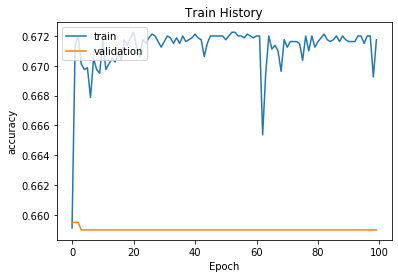

In [27]:
show_train_history(train_history, 'accuracy', 'val_accuracy')